In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from math import pi
import math 


fifa = pd.read_csv('FIFA Player Info.csv', keep_default_na = False)
#fifa = fifa.drop(columns='Unnamed: 0')
data = fifa[['Name','Pace', 'Shooting','Passing', 'Dribbling', 'Defending', 'Physicality']]
HeatmapData = data.groupby('Name').mean()
labels = np.array(HeatmapData.columns.values)
N = len(labels)

angles2 = []
for i in range(N):
    ang = 90 + i*180/np.pi
    if ang > 360:
        ang = abs(360 - ang)
    angles2.append(ang)
angles2.sort()
angles = [ math.radians(i) for i in angles2]
angles

[0.2876110196153103,
 1.5707963267948966,
 2.5707963267948966,
 3.5707963267948966,
 4.570796326794897,
 5.570796326794897]

In [117]:
#name = 'Lionel Messi'
#name2 = 'Neymar Jr'
name = fifa.Name.tolist()[0]
name2 = fifa.Name.tolist()[1253]
stats=HeatmapData.loc[name, labels]
fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'bo', linewidth=1, alpha=0.2)
ax.fill(angles, stats, 'b', alpha=0.1)
stats2=HeatmapData.loc[name2,labels]
ax.plot(angles, stats2, 'ro', linewidth=1, alpha=0.2)
ax.fill(angles, stats2, 'r', alpha=0.1)
ax.set_thetagrids(angles2, labels)
ax.set_title(name + " vs " + name2)
ax.set_label('Label via method')
ax.legend([name, name2], loc=1)
for i in range(N):
    ax.text(angles[i], stats[i], str(int(stats[i])),color='blue', alpha=0.7,fontsize=12,verticalalignment='top', horizontalalignment='left',)
    ax.text(angles[i], stats2[i], str(int(stats2[i])),color='red', alpha=0.7,fontsize=12,verticalalignment='bottom', horizontalalignment='right')
ax.grid(True)

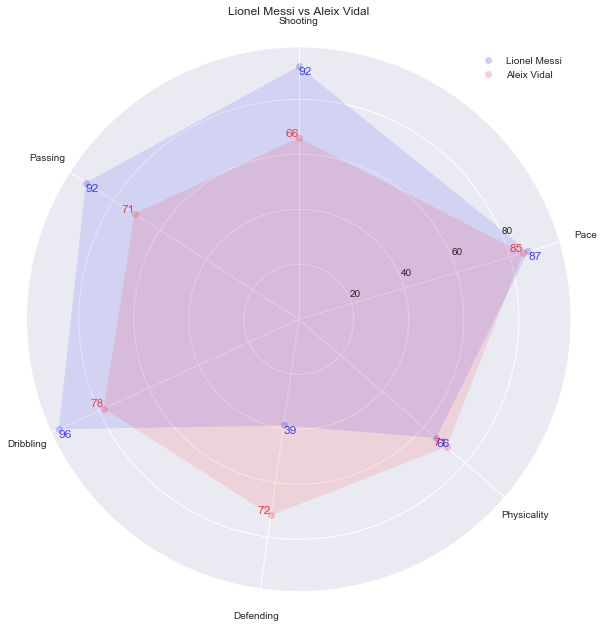

In [49]:
fig

In [118]:
from os.path import dirname, join
from bokeh.models.annotations import Title
from bokeh.plotting import figure
from bokeh.layouts import layout, column, gridplot, widgetbox, row
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.models import ColumnDataSource, Div, Slider, Select, TextInput, RangeSlider, MultiSelect, CheckboxGroup, AutocompleteInput, Panel, Tabs, HoverTool
from bokeh.io import curdoc, output_file, show, output_notebook
import numpy as np
import pandas as pd
from math import pi
import math 

In [119]:
hist_x_axis = ['Skill', 'Weak Foot', 'Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality', 'Height']

In [120]:
club3 = Select(title="Clubs", value = 'Any', options=['Any'] + fifa.sort_values('Club').Club.unique().tolist())
league3 = Select(title="Leagues", value = 'Any', options=['Any'] + fifa.sort_values('League').League.unique().tolist())
country3 = Select(title="Countries", value = 'Any', options=['Any'] + fifa.sort_values('Country').Country.unique().tolist())
position3 = Select(title="Position Groups", value = 'Any', options=['Any'] + fifa.sort_values('Position Group').Country.unique().tolist())
skils3 = Select(title="Skills", value = 'Shooting', options=hist_x_axis)

In [115]:
# TOOLTIPS=[
#     ("Player", "@player"),
#     ("Overall Rating", "@overallrating"),
#     ("Club", "@club"),
#     ("League", "@league"),
#     ("Country", "@country"),
#     ("Position", "@position")
# ]
p = figure(title="Histogram for Pace", background_fill_color="#fafafa", plot_height=600, plot_width=700, sizing_mode="scale_both")
hist, edges = np.histogram(fifa['Pace'], density=False, bins=20)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)
show(p)